In [4]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
x_train, y_train, x_cvx, y_cvx = pd.read_csv("traindata.csv").sample(frac=1).reset_index(drop=True).pipe(lambda df: (df.iloc[:40000, 1:].values, df.iloc[:40000, 0].values, df.iloc[40000:,1: ].values, df.iloc[40000:, 0].values))


In [5]:
def normalize(X, method='z-score'):
    epsilon = 1e-7  # small constant
    if method == 'z-score':
        return (X - np.mean(X, axis=0)) / (np.std(X, axis=0) + epsilon), np.mean(X, axis=0), np.std(X, axis=0)
    elif method == 'min-max':
        return (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0) + epsilon), np.min(X, axis=0), (np.max(X, axis=0) - np.min(X, axis=0) + epsilon)
    else:
        return X

In [6]:
def polynomialFeatures( X1, degree = 4) :
    X = X1.T
    features = (X).copy()
    prev_chunk = X
    indices = list( range( len( X ) ) )

    for d in range( 1, degree ) :
        new_chunk = []
        for i, v in enumerate(X) :
            next_index = len( new_chunk )
            for coef in prev_chunk[indices[i]:] :
                new_chunk.append( v*coef )
            indices[i] = next_index
        features = np.append( features, new_chunk )
        prev_chunk = new_chunk
    features=np.reshape(features,(X.shape[1],-1))
    return features
print("starting")
x_train2=(polynomialFeatures(x_train,6))
print(x_train2)
print(np.shape(x_train2))

starting
[[-1.68884214e+01  3.06465586e+01 -3.29097362e+01 ...  2.85826372e+01
  -2.18011730e+01 -1.11641567e+01]
 [ 2.10625798e+01 -2.69275929e+01  1.94231192e+01 ...  4.82922451e+01
  -5.38797406e+00  3.90613379e+00]
 [ 1.18937371e+01  1.67847232e+01  1.53384908e+01 ...  1.52168981e+01
   3.03033437e+01 -3.00936746e+01]
 ...
 [ 2.17393651e+08  1.40890978e+08  1.61530930e+03 ...  3.49363546e+12
   2.20135376e+08  1.67791952e+11]
 [ 4.49466857e+09  6.03274502e+09  1.63142264e+10 ...  3.02721578e+05
   1.25360369e+07  5.49922943e+10]
 [ 5.87173328e+09  2.08496862e+08  3.09674146e+10 ...  3.18664058e+08
   1.41522007e+06  2.56850740e+07]]
(40000, 83)


In [8]:
compute_Cost = lambda x,y,w_new,b,lambda_,m: (np.sum(np.square(np.dot(x,w_new)+b-y))+np.sum(np.square(w_new))*lambda_)/(2*m)

In [13]:
def gradient_descent(lambda_,x,y,w,b,learning_rate,iters):
    m=len(y)
    for i in range(iters):
        w-= learning_rate*((np.dot(((np.dot(x,w) +b) - y).T, x)/m).T + lambda_*np.sum(w)/m)
        b-= learning_rate*(np.sum((np.dot(x,w)+b-y))/m)
        if i%1000 == 0: print(f"Cost after iteration {i}: {compute_Cost(x,y,w,b,lambda_,m)}\n w: {w} \n b: {b}")
    return w,b

In [14]:
r2 = lambda y_true, y_pred: 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

In [15]:
def polyreg(x,y,x_cvs, y_cvs,lamda, alpha, iters, degree,norm=None):
    x = polynomialFeatures(x, degree)
    print("shape of x after feature scaling is ", np.shape(x))
    if norm:
        x,val1, val2 = normalize(x, method =norm) 
        x_cvs = polynomialFeatures(x_cvs, degree)
        x_cvs = (x_cvs - val1)/val2
    else:
        x_cvs = polynomialFeatures(x_cvs, degree)
    w=np.zeros(x.shape[1])
    b=0
    w,b=gradient_descent(lamda,x,y,w,b,alpha,iters)
    y_pred=np.dot(x_cvs,w)+b
    print("R2 score is ", r2(y_cvs,y_pred))
    plt.scatter(x_cvs[:100, 0], y_cvs[:100], color='red', label='data')
    plt.scatter(x_cvs[:100, 0], y_pred[:100], color='blue',label='prediction')
    plt.legend()
    plt.show()
    return w,b


    
    

shape of x after feature scaling is  (40000, 83)
Cost after iteration 0: 63822451987160.38
 w: [ -423.74876739 -2578.05548626 -2364.86396367 -3926.29572824
 -1706.37540466 -2699.46555885 -1966.7902084    746.11472283
  -535.28555422   476.07494307 -2097.48056862 -1957.22683158
  -324.12165979 -1789.52775691  1233.65963265  3302.05972138
 -1680.20817096 -1892.78786228  -983.68009386   179.64566484
 -1800.10793347 -1926.16723524 -1189.8911667  -2287.88396867
   609.6965878  -2975.81318992 -2628.38429214  1281.24625829
 -1952.62918078 -1527.45227512 -1969.62525342 -1803.93503363
 -1425.83897897 -1022.68743884 -1480.51961677 -1870.51078308
 -1226.30105931 -2496.41730113 -2991.53881403 -1346.8275436
  -377.60082005 -1365.25123547 -1386.73091701  -859.66667943
 -2246.65182755 -1554.70207875   471.37356229 13028.93510824
 -3462.4668247  -2621.64469007 -2303.26051903  1168.88558522
  2504.29549488 -2242.65978287 12319.72195145 -1298.77257446
  -625.19268481 -2013.51428129  7893.35953798  2317.

Cost after iteration 6000: 62533349203497.84
 w: [  1103.4536026  -13150.53473352 -34473.60427709 -33901.62148449
 -14131.07732012 -26440.44347905  -1972.79962507   3810.97823239
  10872.39261343   -243.97200634 -16137.92463373  -5464.43921874
  -6783.83202311  -5034.04117267  16963.96371041  32950.61296609
  17037.15879979   -747.41358317  -7557.94768655  14101.98558372
 -10612.14864258  -1910.13272645  -6728.50476614 -25542.60115745
  12247.13854208 -16465.87366341 -19442.19571353  15427.66361414
 -28518.85529851  -7205.57315958 -16410.50259988   2272.25773124
 -18231.24090792  -9412.32561729  -4985.83015929 -29799.80078944
 -15525.79281539 -25978.22356022 -33015.03412839  -4315.3053822
   5408.9683331     500.62587143 -20084.93557414    880.13725455
 -24681.41772503 -28212.92993638  20465.58520558 110988.85542292
 -30434.60775118 -15460.15783156  -4549.29553047  12799.12116449
  31980.2720342  -16630.91570287 103749.77901134   1776.0814747
   7072.50492082 -32195.50670449  80549.002

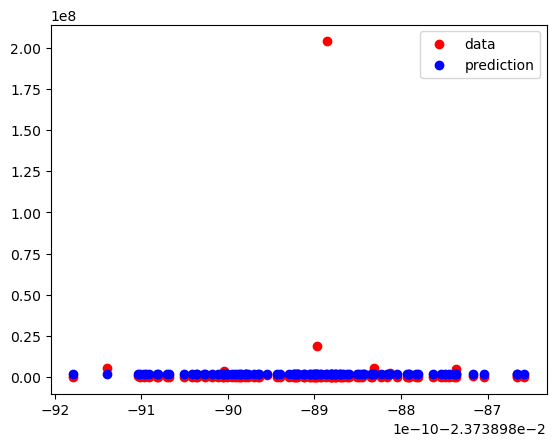

In [16]:
w,b = polyreg(x_train,y_train,x_cvx,y_cvx,0,0.1,10000,6, 'z-score')